In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/Users/mrfai/OneDrive/سطح المكتب/fraudTrain.csv")
df.info()
#Display the data
df.head()
df.info()
#Sum the missing value
df.isnull().sum()
#Summary the description of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [3]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [4]:
# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S').dt.time

# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [6]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_date  1296675 non-null  object 
 1   trans_time  1296675 non-null  object 
 2   cc_num      1296675 non-null  int64  
 3   merchant    1296675 non-null  object 
 4   category    1296675 non-null  object 
 5   amt         1296675 non-null  float64
 6   first       1296675 non-null  object 
 7   last        1296675 non-null  object 
 8   gender      1296675 non-null  object 
 9   street      1296675 non-null  object 
 10  city        1296675 non-null  object 
 11  state       1296675 non-null  object 
 12  zip         1296675 non-null  int64  
 13  lat         1296675 non-null  float64
 14  long        1296675 non-null  float64
 15  city_pop    1296675 non-null  int64  
 16  job         1296675 non-null  object 
 17  dob         1296675 non-null  object 
 18  trans_num   1296675 no

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [8]:
import pandas as pd

# Assuming df is already defined and contains your dataset

# Convert 'dob' to datetime (allowing for automatic format inference)
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S', errors='coerce').dt.time

# Convert 'trans_date' to date (if it's not already in datetime format)
df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')

# Check the data types after conversion
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num                 int64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


## Correlation matrix after preprocessing

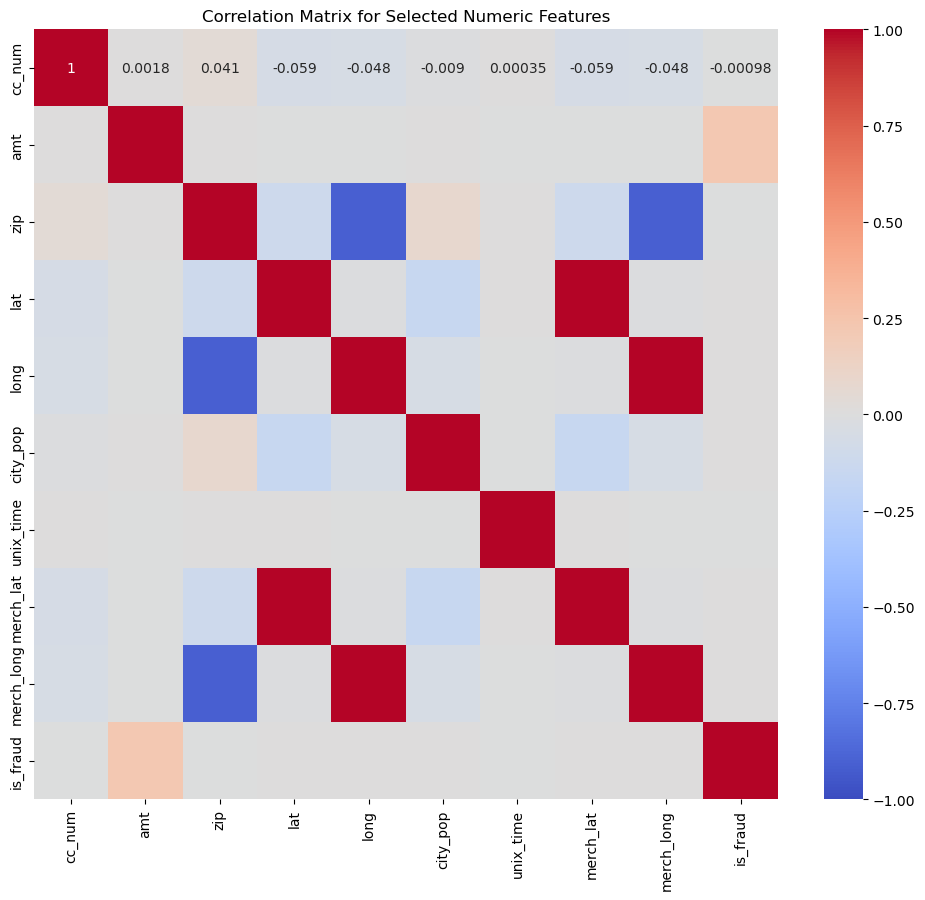

Top Positive Correlations:
cc_num      cc_num        1.0
merch_lat   merch_lat     1.0
unix_time   unix_time     1.0
city_pop    city_pop      1.0
long        long          1.0
lat         lat           1.0
zip         zip           1.0
amt         amt           1.0
merch_long  merch_long    1.0
is_fraud    is_fraud      1.0
dtype: float64

Top Negative Correlations:
long        zip          -0.909732
zip         long         -0.909732
            merch_long   -0.908924
merch_long  zip          -0.908924
lat         city_pop     -0.155730
city_pop    lat          -0.155730
            merch_lat    -0.154781
merch_lat   city_pop     -0.154781
zip         lat          -0.114290
lat         zip          -0.114290
dtype: float64


In [9]:
# Ensure all necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame

# Ensure 'amt' is numeric and convert if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_columns = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Numeric Features')
plt.show()

# Flatten the correlation matrix and sort the pairs
corr_pairs = corr_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values(kind="quicksort")

# Display the top positive and negative correlations
print("Top Positive Correlations:")
print(sorted_corr_pairs[sorted_corr_pairs > 0].tail(10))  # Display top 10 positive correlations

print("\nTop Negative Correlations:")
print(sorted_corr_pairs[sorted_corr_pairs < 0].head(10))  # Display top 10 negative correlations

#### We can see there is some very positive correlations between the distance features namely "merch_lat", "mercg_long", "lat" and "long".
#### "amt", is an important feature
## Analysis
- amt (Amount): Correlation with is_fraud: 0.18
- lat (Latitude): Correlation with is_fraud: 0.0059
- merch_lat (Merchant Latitude): Correlation with is_fraud: 0.0058
- zip (ZIP Code):Correlation with is_fraud: -0.0023
- long (Longitude): Correlation with is_fraud: -0.0021
- cc_num (Credit Card Number):Correlation with is_fraud: -0.0015
- merch_long (Merchant Longitude): Correlation with is_fraud: -0.0011
- city_pop (City Population):Correlation with is_fraud: -0.0049
- unix_time: Correlation with is_fraud: -0.013

#### Focus on amt as an important feature for predicting fraud.
#### Consider dropping features with very weak correlations with is_fraud such as cc_num, zip, lat, long, city_pop, unix_time, merch_lat, and merch_long.
#### Be cautious of multicollinearity between highly correlated features like lat/merch_lat and long/merch_long or zip/long.

# Feature Engineering

## 1. Transaction Frequency Features


In [10]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])

mean      1319.099695
median    1054.000000
min          7.000000
max       3123.000000
Name: count, dtype: float64

In [11]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())

             cc_num trans_date  transactions_per_day
0  2703186189652095 2019-01-01                    69
1      630423337322 2019-01-01                    84
2    38859492057661 2019-01-01                    19
3  3534093764340240 2019-01-01                    19
4   375534208663984 2019-01-01                    82


In [12]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

             cc_num  Week  transaction_per_week
0  2703186189652095     1                    43
1      630423337322     1                    66
2    38859492057661     1                    11
3  3534093764340240     1                     8
4   375534208663984     1                    41


In [13]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
1     104727
2      97657
3     143789
4     134970
5     146875
6     143811
7      86596
8      87359
9      70652
10     68758
11     70421
12    141060
dtype: int64


In [14]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

             cc_num trans_date  transactions_per_month
0  2703186189652095 2019-01-01                     177
1      630423337322 2019-01-01                     249
2    38859492057661 2019-01-01                      43
3  3534093764340240 2019-01-01                      35
4   375534208663984 2019-01-01                     170


In [15]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

## 2. User Transaction Behavior

In [16]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')

In [17]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

## 3. User-Based Features: Age and Gender

In [18]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [19]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)

print(df.dtypes)


 The number of cutomers based on age is:
gender
F    709863
M    586812
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    70.200324
M    70.533350
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       45.401370    43.0
M       45.612414    44.0
----------------------------------------
trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object

## 4. Fraud Transaction Analysis

In [20]:
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')


#Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] /fraud_ratio_per_user['total_transactions']


# Merge the fraud ratio back into the original DataFrame
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')


# Print formatted output
print('\nThe ratio of fraudulent transaction to total transaction per user:')
for index, row in fraud_ratio_per_user.iterrows():
    print(f"Credit Card Number {int(row['cc_num'])}: {row['fraud_ratio']:.2%}")



The ratio of fraudulent transaction to total transaction per user:
Credit Card Number 60416207185: 0.59%
Credit Card Number 60422928733: 0.78%
Credit Card Number 60423098130: 1.96%
Credit Card Number 60427851591: 2.65%
Credit Card Number 60487002085: 0.00%
Credit Card Number 60490596305: 0.99%
Credit Card Number 60495593109: 0.00%
Credit Card Number 501802953619: 0.45%
Credit Card Number 501818133297: 100.00%
Credit Card Number 501828204849: 1.55%
Credit Card Number 501831082224: 0.78%
Credit Card Number 501851115094: 100.00%
Credit Card Number 501882822387: 0.00%
Credit Card Number 501894933032: 100.00%
Credit Card Number 501899453424: 0.53%
Credit Card Number 502012776709: 0.70%
Credit Card Number 502038091380: 0.57%
Credit Card Number 502049568400: 0.48%
Credit Card Number 503848303379: 0.77%
Credit Card Number 503874407318: 0.35%
Credit Card Number 503886119844: 100.00%
Credit Card Number 560881134780: 1.76%
Credit Card Number 561942763351: 0.64%
Credit Card Number 565399283797: 2

In [21]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [22]:
# Function to categorize city_pop
#def categorize_population(population):
#    if population < 1000:
#       return 'Small'
#    elif 1000 <= population <= 10000:
#        return 'Medium'
#    else:
#        return 'Large'

# Apply the function to create a new column 'pop_category'
# df['pop_cat'] = df['city_pop'].apply(categorize_population)

In [23]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)



Aggregated transaction amounts by city:
                          city        amt
0                      Achille   32485.10
1                      Acworth  202428.03
2                        Adams   30856.91
3                        Afton  146101.84
4                        Akron   39798.32
..                         ...        ...
889                Woods Cross   48657.73
890                  Woodville  111276.82
891  Yellowstone National Park   34303.02
892                    Zaleski  151299.07
893                    Zavalla  107956.91

[894 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK   144623.05
1     AL  2682717.10
2     AR  2342468.83
3     AZ   808325.53
4     CA  4138078.51
5     CO  1090171.31
6     CT   498323.98
7     DC   277115.46
8     DE     4630.44
9     FL  3155191.63
10    GA  1821058.13
11    HI   150985.03
12    IA  1770089.29
13    ID   405151.26
14    IL  3011891.30
15    IN  1896

### Total features (old + new)

In [24]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                              int64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

# 6. Resampling dataset

In [25]:
from sklearn.preprocessing import LabelEncoder
## handling all the categorical vairables after removing the unnccesary categorical variables namely - trans_time, first last, street, city, trans_num
label_encoder = LabelEncoder()
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['state'] = label_encoder.fit_transform(df['state'])
df['job'] = label_encoder.fit_transform(df['job'])


df = df.drop(columns=["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "city_pop", "city", "lat", "long", "merch_lat", "merch_long", "zip"])
# Apply the mapping using pandas map function
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

df.info()
print(df.dtypes)

## variables like first and last name are not important or unique
## street, lat, long, city, merch_lat, merch_long , zip are removed as they dont have high or instead show negative corr with target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   cc_num                   1296675 non-null  int64  
 1   merchant                 1296675 non-null  int32  
 2   category                 1296675 non-null  int32  
 3   amt                      1296675 non-null  float64
 4   gender                   1296675 non-null  int64  
 5   state                    1296675 non-null  int32  
 6   job                      1296675 non-null  int32  
 7   unix_time                1296675 non-null  int64  
 8   is_fraud                 1296675 non-null  int64  
 9   transactions_per_day     1296675 non-null  int64  
 10  Week                     1296675 non-null  UInt32 
 11  transaction_per_week     1296675 non-null  int64  
 12  transactions_per_month   1296675 non-null  int64  
 13  transactions_per_season  1296675 non-null 

## Correlation matrix after feature engineering to see new feature relation with Target

In [26]:
total_columns = df.shape[1]
print(f'Total number of columns: {total_columns}')

# Print all column headers
print("Column headers:")
print(df.columns.tolist())

Total number of columns: 20
Column headers:
['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'job', 'unix_time', 'is_fraud', 'transactions_per_day', 'Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio']


In [27]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import numpy as np

# Ensure 'amt' is numeric and convert if necessary
#df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Select the specified numeric columns for correlation calculation
#numeric_columns = [ 'is_fraud', 'transactions_per_day', 'Week', 'transaction_per_week', 
#    'transactions_per_month', 'transactions_per_season', 
#    'avg_trans_amount', 'total_trans_amount', 
#    'med_trans_amount', 'std_trans_amount', 
#    'age', 'fraud_ratio'
#]

#df_numeric = df[numeric_columns]
#
## Calculate the correlation matrix
#corr_matrix = df_numeric.corr()
#
## Set up the matplotlib figure with a larger size
#plt.figure(figsize=(20, 18))  # Increased size for better visibility
#
## Draw the heatmap without a mask
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
#            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
#
#plt.title('Correlation Matrix for after feature selection', fontsize=22)
#plt.xticks(fontsize=10)  # Smaller font size for x-axis labels
#plt.yticks(fontsize=10)  # Smaller font size for y-axis labels
#plt.show()

In [28]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# 
# # Ensure 'amt' is numeric and convert if necessary
# df['amt'] = pd.to_numeric(df['amt'], errors='coerce')
# 
# # Select the specified numeric columns for correlation calculation
# numeric_columns = [
#     'cc_num', 'amt', 'unix_time', 'is_fraud', 'merchant', 'category', 'state', 'job', 
#     'transactions_per_day', 'Week', 'transaction_per_week', 
#     'transactions_per_month', 'transactions_per_season', 
#     'avg_trans_amount', 'total_trans_amount', 
#     'med_trans_amount', 'std_trans_amount', 
#     'age', 'fraud_ratio'
# ]
# 
# df_numeric = df[numeric_columns]
# 
# # Calculate the correlation matrix
# corr_matrix = df_numeric.corr()
# 
# # Set up the matplotlib figure with a larger size
# plt.figure(figsize=(20, 18))  # Increased size for better visibility
# 
# # Draw the heatmap without a mask
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
#             square=True, linewidths=0.5, cbar_kws={"shrink": .8})
# 
# plt.title('Correlation Matrix for new features', fontsize=22)
# plt.xticks(fontsize=10)  # Smaller font size for x-axis labels
# plt.yticks(fontsize=10)  # Smaller font size for y-axis labels
# plt.show()


### 

In [29]:
print(df.dtypes)

cc_num                       int64
merchant                     int32
category                     int32
amt                        float64
gender                       int64
state                        int32
job                          int32
unix_time                    int64
is_fraud                     int64
transactions_per_day         int64
Week                        UInt32
transaction_per_week         int64
transactions_per_month       int64
transactions_per_season      int64
avg_trans_amount           float64
total_trans_amount         float64
med_trans_amount           float64
std_trans_amount           float64
age                          int64
fraud_ratio                float64
dtype: object


## Correlation matrix after balancing

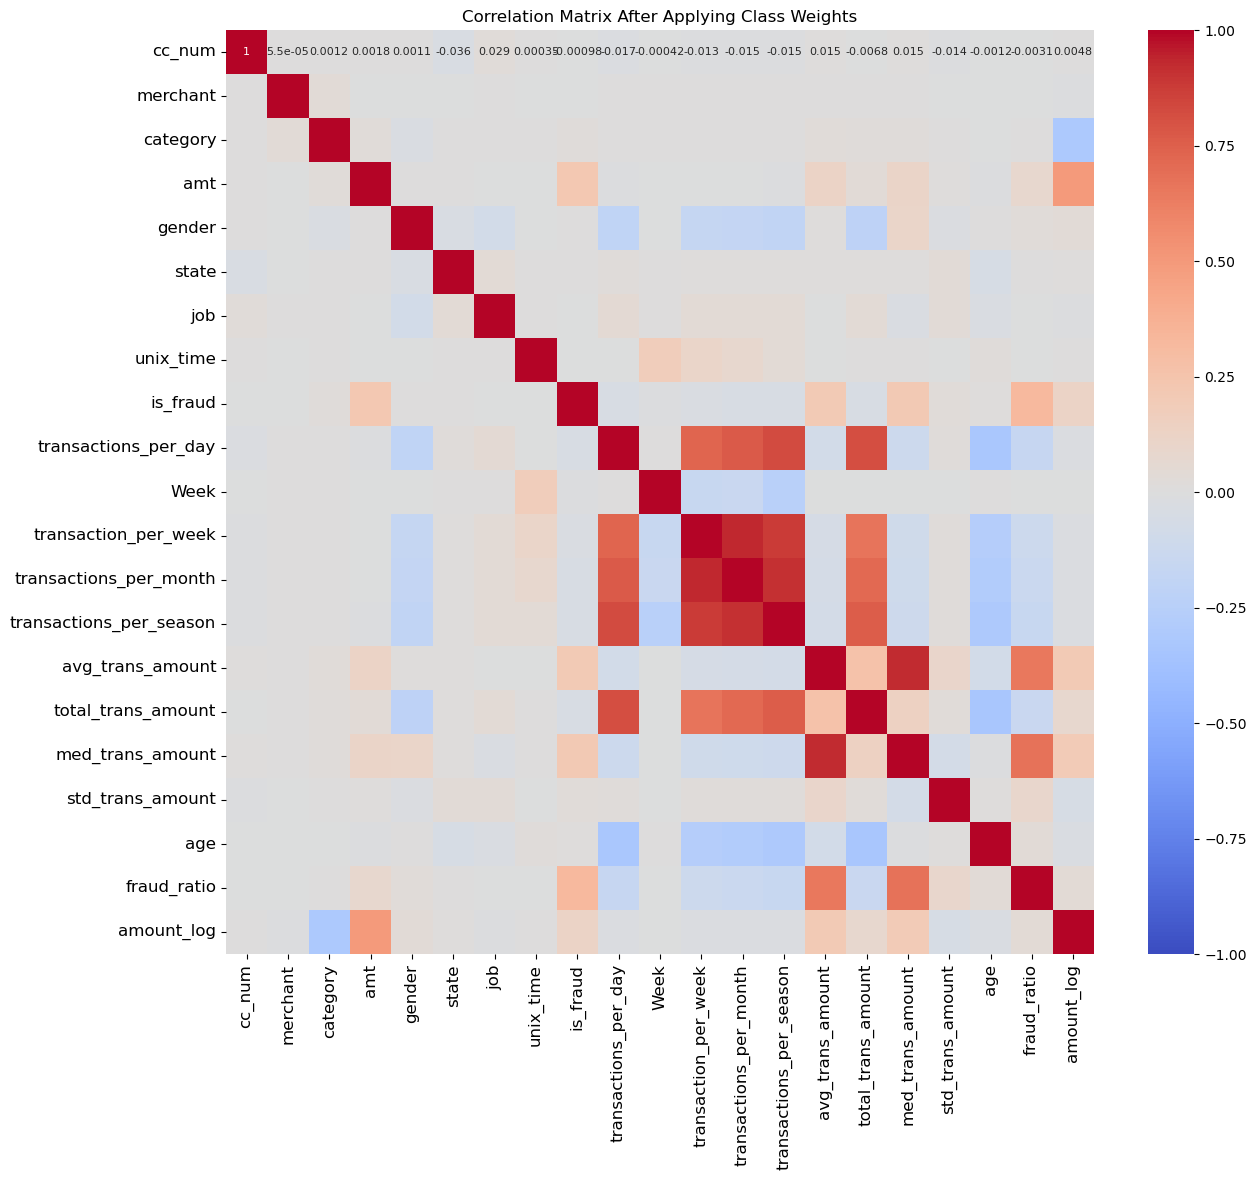

In [30]:
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Convert 'amt' to numeric if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Create new feature based on transaction amounts
df['amount_log'] = np.log(df['amt'] + 1)


# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(df['is_fraud']), y=df['is_fraud'])
class_weights_dict = dict(enumerate(class_weights))

# Optionally, you can use the class weights in your model training process.

# Exclude non-numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 12))  # Adjusted size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Adjusted font size
plt.title('Correlation Matrix After Applying Class Weights', fontsize=12)
plt.xticks(fontsize=12)  # Adjust x-axis labels font size
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Split data into features (X) and targets (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to run KNN Classifier
def run_KNN(X_train, X_test, y_train, y_test, n_neighbors, weights):
    knn = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        n_jobs=4
    )

    knn.fit(X_train, y_train)
    print('Train set')
    pred_train = knn.predict_proba(X_train)
    print('roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:, 1])))
    print('Test set')
    pred_test = knn.predict_proba(X_test)
    print('roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:, 1])))
   
   # Print Confusion Matrix
    y_test_pred = knn.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))

    # Print classification report
    print('\nClassification Report:')
    y_pred = knn.predict(X_test)
    print(classification_report(y_test, y_pred))

(1037340, 20) (259335, 20) (1037340,) (259335,)


In [34]:
# Evaluate model with uniform weights
print("Model with uniform weights:")
run_KNN(X_train_scaled, X_test_scaled, y_train, y_test, n_neighbors=5, weights='uniform')

# Evaluate model with distance weights
print("\nModel with distance weights:")
run_KNN(X_train_scaled, X_test_scaled, y_train, y_test, n_neighbors=5, weights='distance')

Model with uniform weights:
Train set
roc-auc: 0.9988557105764788
Test set
roc-auc: 0.9076795044794461
Confusion Matrix:
[[257560    255]
 [   734    786]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.76      0.52      0.61      1520

    accuracy                           1.00    259335
   macro avg       0.88      0.76      0.81    259335
weighted avg       1.00      1.00      1.00    259335


Model with distance weights:
Train set
roc-auc: 1.0
Test set
roc-auc: 0.9080921818174394
Confusion Matrix:
[[257555    260]
 [   619    901]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.78      0.59      0.67      1520

    accuracy                           1.00    259335
   macro avg       0.89      0.80      0.84    259335
weighted avg       1.00      1.00      1.00    259335
